# China Real Estate Demand Prediction - EDA

This notebook explores the training data: distributions, missingness, correlations, and time series patterns.

- Load all CSVs from `data/raw/train`
- Parse `month` and `sector` into structured fields
- Visualize distributions and trends
- Identify leakage risks (no future info when predicting a month)



In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
import plotly.express as px

import sys
sys.path.append(str(Path('..').resolve()))

from src.data import DatasetPaths, load_all_training_tables, split_month_sector
from src.features import aggregate_monthly_totals

paths = DatasetPaths(root_dir=str(Path('..').resolve()))
train = load_all_training_tables(paths)

nht = train['new_house_transactions']
nht_aug = split_month_sector(nht)

print(nht_aug.head())



      month    sector  num_new_house_transactions  \
0  2019-Jan  sector 1                          52   
1  2019-Jan  sector 2                         145   
2  2019-Jan  sector 4                           6   
3  2019-Jan  sector 5                           2   
4  2019-Jan  sector 6                           5   

   area_new_house_transactions  price_new_house_transactions  \
0                         4906                         28184   
1                        15933                         17747   
2                          725                         28004   
3                          212                         37432   
4                          773                         15992   

   amount_new_house_transactions  area_per_unit_new_house_transactions  \
0                       13827.14                                    94   
1                       28277.73                                   110   
2                        1424.21                                   127   


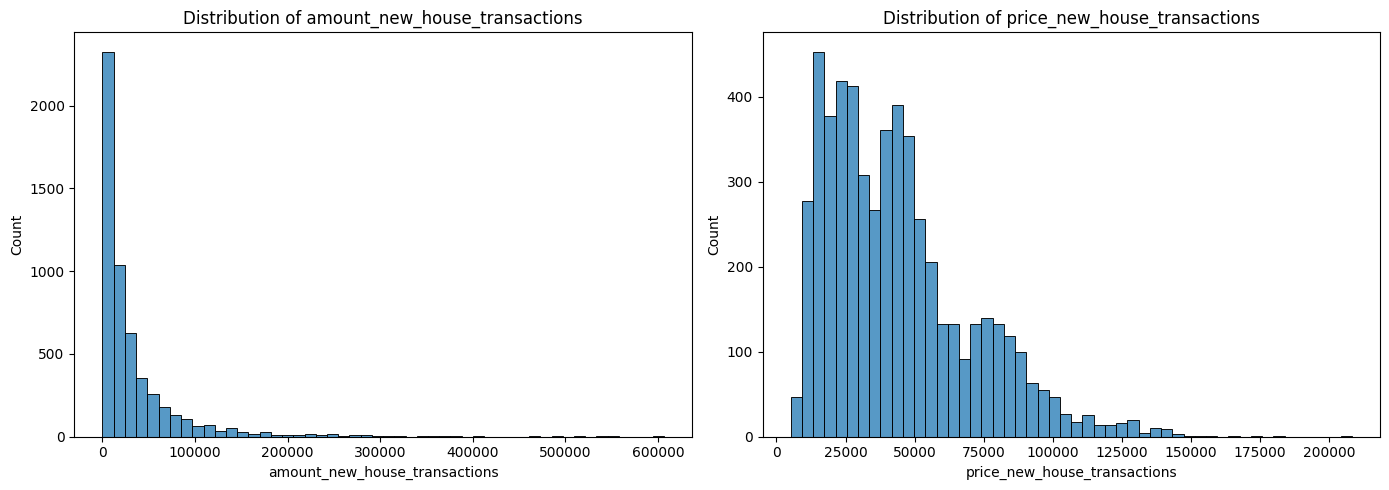

In [2]:
# Distributions of target and key numeric columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(nht_aug['amount_new_house_transactions'], bins=50, ax=axes[0])
axes[0].set_title('Distribution of amount_new_house_transactions')

sns.histplot(nht_aug['price_new_house_transactions'], bins=50, ax=axes[1])
axes[1].set_title('Distribution of price_new_house_transactions')
plt.tight_layout()
plt.show()

# Time series total across sectors
monthly_total = aggregate_monthly_totals(nht)
px.line(monthly_total, x='time', y='amount_new_house_transactions', title='Total amount per time').show()



In [3]:
# Missingness overview (top 20 by missing rate)
miss = nht_aug.isna().mean().sort_values(ascending=False)
print(miss.head(20))



num_new_house_available_for_sale               0.002577
area_new_house_available_for_sale              0.002577
period_new_house_sell_through                  0.002577
month                                          0.000000
sector                                         0.000000
num_new_house_transactions                     0.000000
area_new_house_transactions                    0.000000
price_new_house_transactions                   0.000000
amount_new_house_transactions                  0.000000
area_per_unit_new_house_transactions           0.000000
total_price_per_unit_new_house_transactions    0.000000
year                                           0.000000
month_num                                      0.000000
time                                           0.000000
sector_id                                      0.000000
dtype: float64


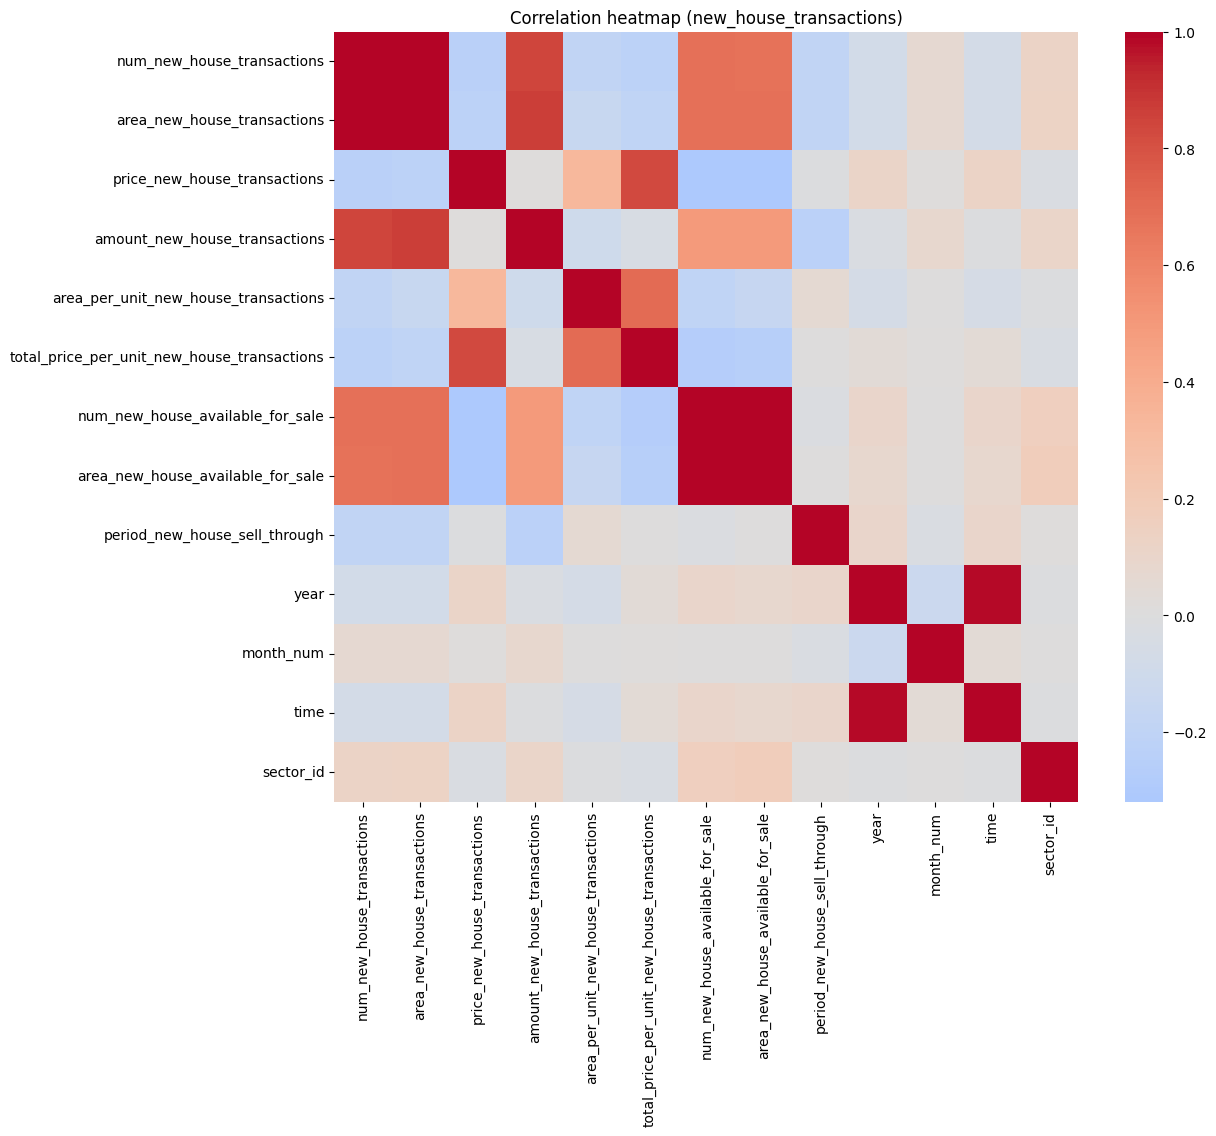

In [4]:
# Correlation heatmap for numeric columns
num_cols = nht_aug.select_dtypes(include=['number']).columns
corr = nht_aug[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation heatmap (new_house_transactions)')
plt.show()

